# Machine Learning in TensorFlow and Keras

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar: 

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../a1/information_theory.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

### Preliminaries...

Before we do anything else, let's load our data and take a quick look at it.  In this example, we're going to build a (very) simple binary classifier based on two floating point features.

In [9]:
import data
%matplotlib inline
from matplotlib import pyplot as plt

(2500, 2)
(500, 2)


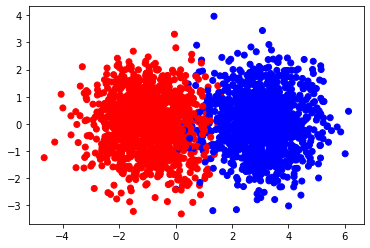

In [10]:
X_train, y_train, X_test, y_test = data.generate_data(2500, 500) #large test size to make diagrams better
print(X_train.shape)
print(X_test.shape)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

### Training Logistic Regression

It's clear that the data is separable with a vertical line.  The simplest model we can use for this data is logistic regression.  Let's do that.

In [11]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.9.1


In [12]:
#####
## MAKE SURE YOU UNDERSTAND THIS CODE!!
##
## Look up keras.Sequential and keras.layers.Dense!
##
## You will need to use them to write your own model down below!
#####

# Sequential models are ones where the set of specified layers are stacked each on top of the previous.
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity.
    keras.layers.Dense(1, activation='sigmoid')
])

# adam optimizer is a fancier version of gradient descent.  You can read more about it here: https://arxiv.org/pdf/1412.6980.pdf
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

linear_model.fit(X_train, y_train, epochs=15)

Epoch 1/15
79/79 [==============================] - 1s 5ms/step - loss: 0.7987 - accuracy: 0.5532
Epoch 2/15
79/79 [==============================] - 0s 1ms/step - loss: 0.7159 - accuracy: 0.6072
Epoch 3/15
79/79 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.6480
Epoch 4/15
79/79 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.6984
Epoch 5/15
79/79 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7384
Epoch 6/15
79/79 [==============================] - 0s 987us/step - loss: 0.4742 - accuracy: 0.7744
Epoch 7/15
79/79 [==============================] - 0s 923us/step - loss: 0.4314 - accuracy: 0.8124
Epoch 8/15
79/79 [==============================] - 0s 885us/step - loss: 0.3946 - accuracy: 0.8416
Epoch 9/15
79/79 [==============================] - 0s 859us/step - loss: 0.3626 - accuracy: 0.8668
Epoch 10/15
79/79 [==============================] - 0s 987us/step - loss: 0.3348 - accuracy: 0.8896
Epoch 11/

**Hint:** You should expect to see an initial loss here of 0.2 - 1.2.  This is because a well-initialized random classifier tends to output a uniform distribution.  For each example in the batch, we either compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`).  Both cases result in $-\lg(0.5) = lg(2) = 1.0$.

Of course, your random classifier won't output exactly uniform distributions (it's random after all), but you should anticipate it being pretty close.  If it's not, your initialization may be broken and make it hard for your network to learn.

**[Optional]** Some technical details... if your randomly initialized network is outputting very confident predictions, the loss computed may be very large while at the same time the sigmoids in the network are likely in saturation, quickly shrinking gradients.  The result is that you make tiny updates in the face of a huge loss.

Let's use our model to make predictions on the test set:

16/16 [==============================] - 0s 1ms/step


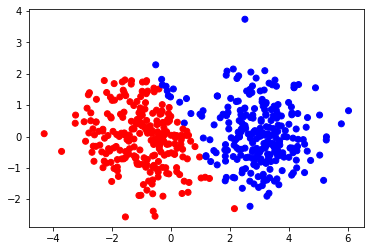

In [13]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### But what about a harder problem?

The case above, the data was linearly separable making it susceptible to a linear classifier.

But what if you had data that looked more like this?

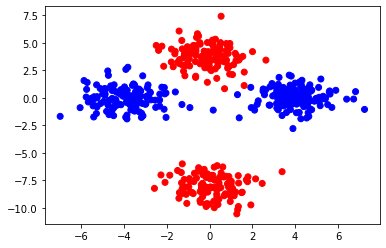

In [17]:
X_train, y_train, X_test, y_test = data.generate_non_linear_data(2500, 500)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [18]:
linear_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 1ms/step - loss: 1.3942 - accuracy: 0.5224
Epoch 2/10
79/79 [==============================] - 0s 1ms/step - loss: 1.1508 - accuracy: 0.5488
Epoch 3/10
79/79 [==============================] - 0s 1ms/step - loss: 0.9987 - accuracy: 0.5776
Epoch 4/10
79/79 [==============================] - 0s 1ms/step - loss: 0.8980 - accuracy: 0.5912
Epoch 5/10
79/79 [==============================] - 0s 1ms/step - loss: 0.8274 - accuracy: 0.5968
Epoch 6/10
79/79 [==============================] - 0s 1ms/step - loss: 0.7768 - accuracy: 0.5884
Epoch 7/10
79/79 [==============================] - 0s 1ms/step - loss: 0.7388 - accuracy: 0.5636
Epoch 8/10
79/79 [==============================] - 0s 1ms/step - loss: 0.7122 - accuracy: 0.5424
Epoch 9/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5196
Epoch 10/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5064


Again, let's make predictions on the test set...

16/16 [==============================] - 0s 1ms/step


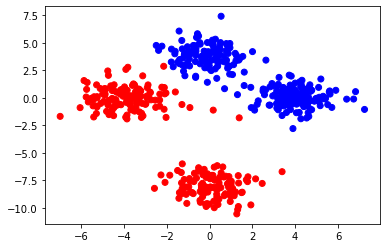

In [19]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

That isn't very good!

### Building a deeper network

Ok, now it's your turn.  Build a deeper neural network below.  Try to achieve a loss less than 0.05.  Initialization is random, but try to make it happen "almost" always (e.g. 90% of the time).

In [43]:
trials = 8

for neuron in range(24):
    for layer in range(24):
        loss_mean = 0
        acc_mean = 0
        for trial in range(trials):
            deep_model = keras.Sequential()

            for i in range(layer):
                deep_model.add(keras.layers.Dense(neuron, activation='relu'))

            deep_model.add(keras.layers.Dense(1, activation='sigmoid'))


            deep_model.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

            history = deep_model.fit(X_train, y_train, epochs=10, verbose=False)
            loss_mean += history.history['loss'][-1]
            acc_mean += history.history['accuracy'][-1]

        if loss_mean/trials < 0.05:
            print(f"\nneurons {neuron}; layers {layer}")
            print(f"loss: {loss_mean / trials}")
            print(f"accuracy: {acc_mean / trials}")



neurons 5; layers 6
loss: 0.028184140333905816
accuracy: 0.9964000061154366

neurons 6; layers 3
loss: 0.049251009710133076
accuracy: 0.9971000105142593

neurons 6; layers 4
loss: 0.025705108419060707
accuracy: 0.9965000078082085

neurons 6; layers 5
loss: 0.035892173647880554
accuracy: 0.9969500079751015

neurons 6; layers 6
loss: 0.009574294730555266
accuracy: 0.9969500079751015

neurons 6; layers 8
loss: 0.023245544463861734
accuracy: 0.9971500113606453

neurons 6; layers 9
loss: 0.03603602421935648
accuracy: 0.9966500028967857

neurons 6; layers 13
loss: 0.01141133246710524
accuracy: 0.995949998497963

neurons 7; layers 4
loss: 0.04097741318400949
accuracy: 0.9968500137329102

neurons 7; layers 5
loss: 0.009326360130216926
accuracy: 0.9972500130534172

neurons 7; layers 6
loss: 0.021829583798535168
accuracy: 0.9968000054359436

neurons 7; layers 8
loss: 0.02336624398594722
accuracy: 0.9967500045895576

neurons 7; layers 9
loss: 0.032752632338088006
accuracy: 0.9971000105142593

ne

16/16 [==============================] - 0s 3ms/step


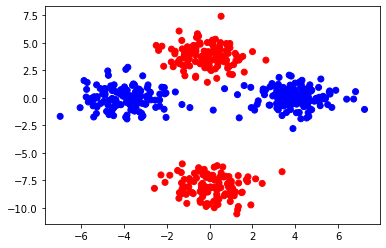

In [42]:
predictions = deep_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

# Congratulations...
... you've trained a nonlinear classifier with TensorFlow and Keras!